In [1]:
from simple_train import load_model
from eval_model import get_image_paths, infer_folder, evaluate_model
import torch

In [2]:
TRAIN_FOLDER = r'D:\Work\Dataset\Misahub-CapsuleVision-Dataset\Dataset\training'
VAL_FOLDER   =   r'D:\Work\Dataset\Misahub-CapsuleVision-Dataset\Dataset\validation'
TEST_FOLDER  = r'D:\Work\Challenges\Misahub-Capsule-Vision\datasets\CapsuleVisionTestDataset\Testing set\Testing set\Images'

train_paths, val_paths, test_image_paths = get_image_paths(TRAIN_FOLDER, 
                                                           VAL_FOLDER,
                                                           TEST_FOLDER)

Number of training folders: 10
Number of validation folders: 10
Number of test images: 4385
Number of training images: 37607
Number of validation images: 16132


In [3]:
best_model = r'D:\Work\Challenges\Misahub-Capsule-Vision\models\efficientvit\ch_checkpoints\22\EfficientViT-L2-submission-capsvision2024-Team-eAI.pt'

model = load_model(num_classes=10)
checkpoint = torch.load(best_model)
model.load_state_dict(checkpoint)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()
model = model.to(device)  

print(f'Model path : {best_model}')
print('Model Loaded ..')


Number of trainable parameters: 11447818
Number of non-trainable parameters: 49090208
Model path : D:\Work\Challenges\Misahub-Capsule-Vision\models\efficientvit\ch_checkpoints\22\EfficientViT-L2-submission-capsvision2024-Team-eAI.pt
Model Loaded ..


  0%|          | 0/37607 [00:00<?, ?it/s]c:\Users\girin\anaconda3\envs\torchvision_odd\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 37607/37607 [27:23<00:00, 22.88it/s]  


========= Training Performance =========


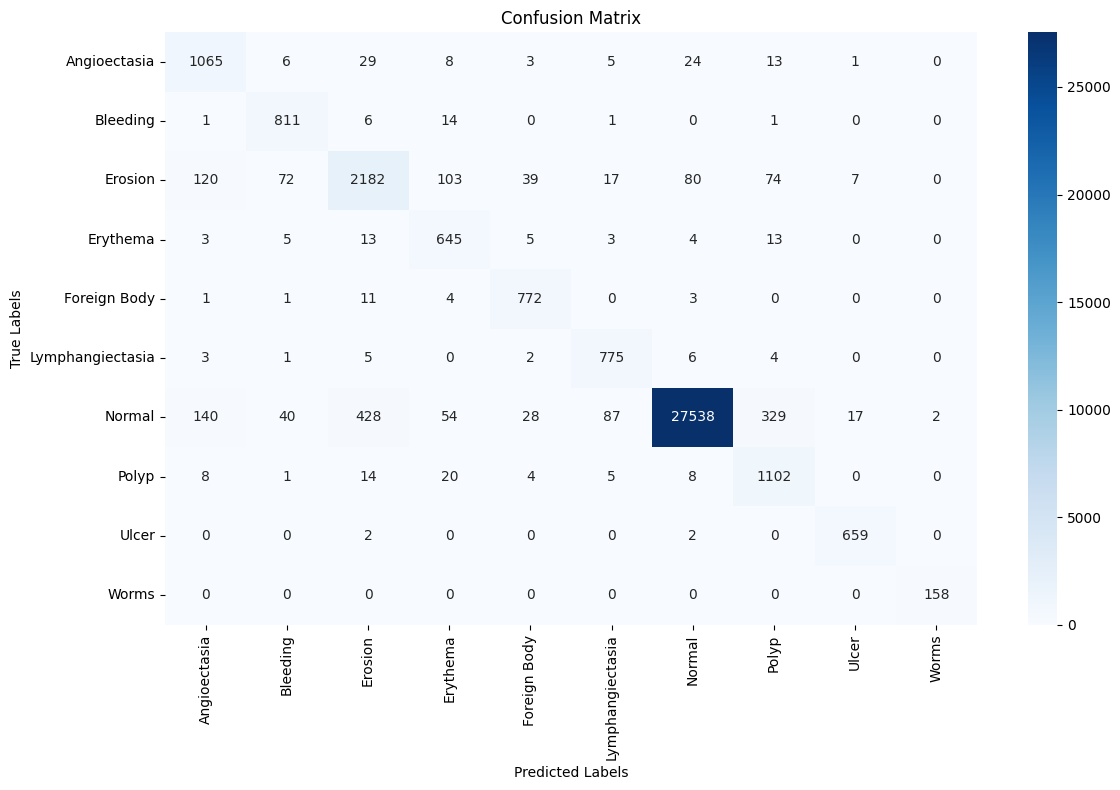

                  precision    recall  f1-score   support

    Angioectasia       0.79      0.92      0.85      1154
        Bleeding       0.87      0.97      0.92       834
         Erosion       0.81      0.81      0.81      2694
        Erythema       0.76      0.93      0.84       691
    Foreign Body       0.91      0.97      0.94       792
Lymphangiectasia       0.87      0.97      0.92       796
          Normal       1.00      0.96      0.98     28663
           Polyp       0.72      0.95      0.82      1162
           Ulcer       0.96      0.99      0.98       663
           Worms       0.99      1.00      0.99       158

        accuracy                           0.95     37607
       macro avg       0.87      0.95      0.90     37607
    weighted avg       0.96      0.95      0.95     37607

Mean AUC: 1.00
Balanced Accuracy: 0.95



In [4]:
df = infer_folder(model,
                  train_paths, 
                  type='train',
                  device=device)
    

print('========= Training Performance =========')
rep = evaluate_model(df)

print(rep['classification_report'])  
print(f'Mean AUC: {rep["mean_auc"]:.2f}')
print(f'Balanced Accuracy: {rep["balanced_accuracy"]:.2f}')
print()

100%|██████████| 16132/16132 [10:23<00:00, 25.89it/s]


========= Validation Performance =========


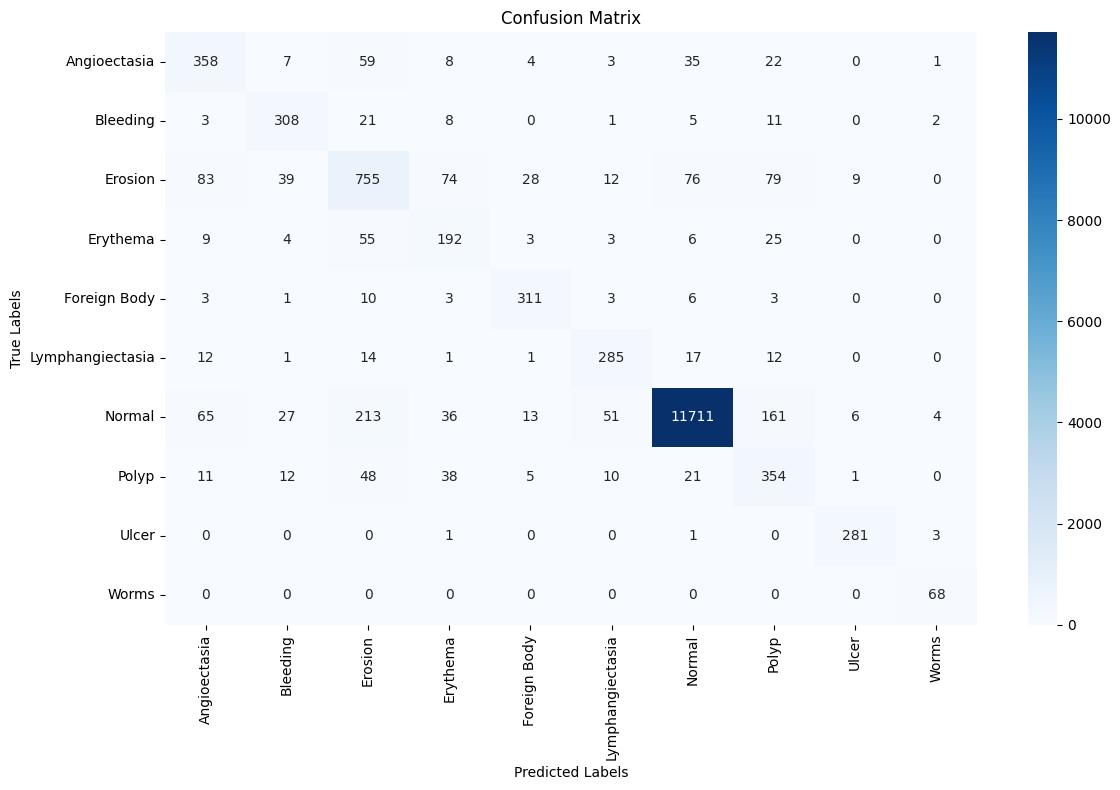

                  precision    recall  f1-score   support

    Angioectasia       0.66      0.72      0.69       497
        Bleeding       0.77      0.86      0.81       359
         Erosion       0.64      0.65      0.65      1155
        Erythema       0.53      0.65      0.58       297
    Foreign Body       0.85      0.91      0.88       340
Lymphangiectasia       0.77      0.83      0.80       343
          Normal       0.99      0.95      0.97     12287
           Polyp       0.53      0.71      0.61       500
           Ulcer       0.95      0.98      0.96       286
           Worms       0.87      1.00      0.93        68

        accuracy                           0.91     16132
       macro avg       0.76      0.83      0.79     16132
    weighted avg       0.92      0.91      0.91     16132

Mean AUC: 0.98
Balanced Accuracy: 0.83



In [5]:
df = infer_folder(model,
                  val_paths, 
                  type='val',
                  device=device)
    

print('========= Validation Performance =========')
rep = evaluate_model(df)

print(rep['classification_report'])  
print(f'Mean AUC: {rep["mean_auc"]:.2f}')
print(f'Balanced Accuracy: {rep["balanced_accuracy"]:.2f}')
print()